In [1]:
import tensorflow as tf
import numpy as np
import PIL.Image as PILImage
import scipy
import matplotlib.pyplot as plt
from hyperparameters import *
from models import *
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
tf.reset_default_graph()
sess = tf.Session()

In [3]:
real_data_placeholder = tf.placeholder('float', shape=[batch_size, image_size, image_size, 3])
z_placeholder = tf.placeholder(tf.float32, [batch_size, noise_dimension])

In [4]:
disc_output_real = forward_pass_discriminator(real_data_placeholder)
gen_output = forward_pass_generator(z_placeholder)
disc_output_fake = forward_pass_discriminator(gen_output, reuse='False')

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
real_image_loss = l1_loss(real_data_placeholder, disc_output_real)
fake_image_loss = l1_loss(gen_output, disc_output_fake)
discriminator_loss = discriminator_loss(real_image_loss, fake_image_loss, kt_equilbrium_term)
generator_loss = fake_image_loss
convergence = convergence(real_image_loss, fake_image_loss, gamma_diversity_ratio)

In [6]:
tvars = tf.trainable_variables()
disc_vars = [var for var in tvars if 'dec' in var.name]
gen_vars = [var for var in tvars if 'gen' in var.name]

In [7]:
adam = tf.train.AdamOptimizer(learning_rate)
dis_opt = adam.minimize(discriminator_loss, var_list=disc_vars)
gen_opt = adam.minimize(generator_loss, var_list=gen_vars)

In [8]:
import mnist_preprocess

data = mnist_preprocess.load_mnist_color()
print(data.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist\t10k-images-idx3-ubyte.gz
Extracting mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 64, 64, 3)


In [11]:
sess.run(tf.global_variables_initializer())
iterations=10000
for i in range(iterations):
    z_batch = np.random.uniform(-1,1,size=[batch_size, noise_dimension])
    
    start_batch = i*batch_size
    end_batch = start_batch+batch_size
    real_image_batch = data[start_batch:end_batch, :,:,:]
    
    _, total_disc_loss=sess.run([dis_opt, discriminator_loss], feed_dict={z_placeholder: z_batch, real_data_placeholder: real_image_batch})
    _, total_gen_loss=sess.run([gen_opt, generator_loss], feed_dict={z_placeholder: z_batch})
    
    m_global = sess.run([convergence], feed_dict={z_placeholder: z_batch, real_data_placeholder: real_image_batch})
    
    print("Step: {}, Convergence: {} ,Discriminator Loss: {}, Generator Loss {}".format(i, m_global, total_disc_loss, total_gen_loss))

Step: 0, Convergence: [1147048700000.0] ,Discriminator Loss: 964849344.0, Generator Loss 1228756353024.0
Step: 1, Convergence: [972264100000.0] ,Discriminator Loss: 911204928.0, Generator Loss 1031720599552.0
Step: 2, Convergence: [858249500000.0] ,Discriminator Loss: 902264384.0, Generator Loss 909101498368.0
Step: 3, Convergence: [715364700000.0] ,Discriminator Loss: 814530624.0, Generator Loss 748472303616.0
Step: 4, Convergence: [616106300000.0] ,Discriminator Loss: 754198720.0, Generator Loss 644378263552.0
Step: 5, Convergence: [537418070000.0] ,Discriminator Loss: 710216512.0, Generator Loss 559959441408.0
Step: 6, Convergence: [488020600000.0] ,Discriminator Loss: 701753984.0, Generator Loss 504160419840.0
Step: 7, Convergence: [450076250000.0] ,Discriminator Loss: 612606656.0, Generator Loss 462202765312.0
Step: 8, Convergence: [419454750000.0] ,Discriminator Loss: 612450496.0, Generator Loss 428657999872.0
Step: 9, Convergence: [388064870000.0] ,Discriminator Loss: 559074624.

Step: 80, Convergence: [38682894000.0] ,Discriminator Loss: 87847768.0, Generator Loss 38823718912.0
Step: 81, Convergence: [37960573000.0] ,Discriminator Loss: 86501632.0, Generator Loss 38091358208.0
Step: 82, Convergence: [37726510000.0] ,Discriminator Loss: 89574648.0, Generator Loss 37855997952.0
Step: 83, Convergence: [38108054000.0] ,Discriminator Loss: 88313976.0, Generator Loss 38239539200.0
Step: 84, Convergence: [36741214000.0] ,Discriminator Loss: 81461128.0, Generator Loss 36858048512.0
Step: 85, Convergence: [35132930000.0] ,Discriminator Loss: 86303216.0, Generator Loss 35253264384.0
Step: 86, Convergence: [34723336000.0] ,Discriminator Loss: 91396648.0, Generator Loss 34830987264.0
Step: 87, Convergence: [35203387000.0] ,Discriminator Loss: 83101312.0, Generator Loss 35315912704.0
Step: 88, Convergence: [35077960000.0] ,Discriminator Loss: 85714336.0, Generator Loss 35186663424.0
Step: 89, Convergence: [32789205000.0] ,Discriminator Loss: 76482088.0, Generator Loss 3289

Step: 161, Convergence: [12763643000.0] ,Discriminator Loss: 34131096.0, Generator Loss 12787113984.0
Step: 162, Convergence: [12206275000.0] ,Discriminator Loss: 32939984.0, Generator Loss 12226327552.0
Step: 163, Convergence: [12643485000.0] ,Discriminator Loss: 34254588.0, Generator Loss 12665394176.0
Step: 164, Convergence: [12294810000.0] ,Discriminator Loss: 32681256.0, Generator Loss 12321141760.0
Step: 165, Convergence: [12354573000.0] ,Discriminator Loss: 33562304.0, Generator Loss 12375318528.0
Step: 166, Convergence: [11550928000.0] ,Discriminator Loss: 33264166.0, Generator Loss 11569523712.0
Step: 167, Convergence: [11672187000.0] ,Discriminator Loss: 33272730.0, Generator Loss 11690099712.0
Step: 168, Convergence: [11746844000.0] ,Discriminator Loss: 31353022.0, Generator Loss 11773260800.0
Step: 169, Convergence: [11683155000.0] ,Discriminator Loss: 30196626.0, Generator Loss 11704209408.0
Step: 170, Convergence: [11126802000.0] ,Discriminator Loss: 30068576.0, Generator

Step: 243, Convergence: [1433806600.0] ,Discriminator Loss: 3353162.75, Generator Loss 1434230144.0
Step: 244, Convergence: [1425835400.0] ,Discriminator Loss: 3075296.75, Generator Loss 1426811008.0
Step: 245, Convergence: [1435948300.0] ,Discriminator Loss: 2977841.25, Generator Loss 1436901504.0
Step: 246, Convergence: [1419173900.0] ,Discriminator Loss: 2972284.0, Generator Loss 1419842048.0
Step: 247, Convergence: [1312189000.0] ,Discriminator Loss: 3092790.25, Generator Loss 1312820352.0
Step: 248, Convergence: [1277582500.0] ,Discriminator Loss: 3269773.25, Generator Loss 1277901312.0
Step: 249, Convergence: [1310686500.0] ,Discriminator Loss: 2651417.75, Generator Loss 1311399296.0
Step: 250, Convergence: [1174929700.0] ,Discriminator Loss: 2416801.75, Generator Loss 1175350272.0
Step: 251, Convergence: [1154298800.0] ,Discriminator Loss: 2587463.5, Generator Loss 1154832384.0
Step: 252, Convergence: [1120443900.0] ,Discriminator Loss: 2418510.75, Generator Loss 1120828800.0
St

Step: 326, Convergence: [327543460.0] ,Discriminator Loss: 767866.5, Generator Loss 327450912.0
Step: 327, Convergence: [344260480.0] ,Discriminator Loss: 667646.6875, Generator Loss 344251744.0
Step: 328, Convergence: [304785100.0] ,Discriminator Loss: 645370.5625, Generator Loss 304678112.0
Step: 329, Convergence: [328441120.0] ,Discriminator Loss: 731694.4375, Generator Loss 328350976.0
Step: 330, Convergence: [336335580.0] ,Discriminator Loss: 640264.8125, Generator Loss 336303456.0
Step: 331, Convergence: [310629250.0] ,Discriminator Loss: 745507.9375, Generator Loss 310520960.0
Step: 332, Convergence: [323442240.0] ,Discriminator Loss: 685832.8125, Generator Loss 323377280.0
Step: 333, Convergence: [284063900.0] ,Discriminator Loss: 591098.4375, Generator Loss 284039904.0
Step: 334, Convergence: [324747800.0] ,Discriminator Loss: 614028.1875, Generator Loss 324723488.0
Step: 335, Convergence: [291605630.0] ,Discriminator Loss: 660884.875, Generator Loss 291522176.0
Step: 336, Con

Step: 410, Convergence: [189455680.0] ,Discriminator Loss: 318243.65625, Generator Loss 189479760.0
Step: 411, Convergence: [156957260.0] ,Discriminator Loss: 367054.53125, Generator Loss 156891792.0
Step: 412, Convergence: [167007260.0] ,Discriminator Loss: 311324.96875, Generator Loss 166980688.0
Step: 413, Convergence: [158304660.0] ,Discriminator Loss: 292802.875, Generator Loss 158297632.0
Step: 414, Convergence: [157874720.0] ,Discriminator Loss: 295787.78125, Generator Loss 157868448.0
Step: 415, Convergence: [150693380.0] ,Discriminator Loss: 300156.875, Generator Loss 150670704.0
Step: 416, Convergence: [163178130.0] ,Discriminator Loss: 320063.40625, Generator Loss 163157744.0
Step: 417, Convergence: [164412720.0] ,Discriminator Loss: 307524.875, Generator Loss 164379440.0
Step: 418, Convergence: [165006430.0] ,Discriminator Loss: 291841.6875, Generator Loss 164995984.0
Step: 419, Convergence: [170000670.0] ,Discriminator Loss: 292889.28125, Generator Loss 170001616.0
Step: 4

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


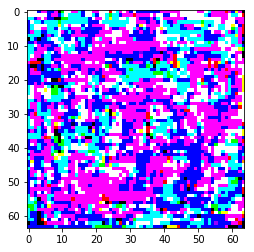

In [14]:
sample_image=forward_pass_generator(z_placeholder, reuse=True)
z_batch = np.random.uniform(-1,1,size=[16, noise_dimension])
temp = (sess.run(sample_image, feed_dict={z_placeholder: z_batch}))
# my_i = temp.squeeze()
plt.imshow(temp[2])
plt.show()